## Fetch Data

In [3]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import glob
import statistics

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# read data
data = pd.read_csv('mlp.csv')

In [5]:
data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [6]:
# drop the row no column and rename the columns
data.drop(["No"], axis=1, inplace=True)
data.rename(columns = {'year': 'Year',
                       'month': 'Month',
                       'day': "Day",
                       'hour': 'Hour',
                       'pm2.5': 'PM2.5',
                       'DEWP': 'DewP',
                       'TEMP': 'Temp',
                       'PRES': 'Press',
                       'RAIN': 'Rain',
                       'wd': 'WinDir',
                       'WSPM': 'WinSpeed',
                       'station': 'Station'}, inplace = True)
data

,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinDir,WinSpeed,Station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [7]:
# check the null data
data.isnull().sum()

Year           0
Month          0
Day            0
Hour           0
PM2.5        925
PM10         718
SO2          935
NO2         1023
CO          1776
O3          1719
Temp          20
Press         20
DewP          20
Rain          20
WinDir        81
WinSpeed      14
Station        0
dtype: int64

In [10]:
data['Month'].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2])

In [8]:
data.dtypes

Year          int64
Month         int64
Day           int64
Hour          int64
PM2.5       float64
PM10        float64
SO2         float64
NO2         float64
CO          float64
O3          float64
Temp        float64
Press       float64
DewP        float64
Rain        float64
WinDir       object
WinSpeed    float64
Station      object
dtype: object

In [11]:
# fill the null values in numerical columns with average specific to certain column
# fill in the missing data in the columns according to the Month average.
unique_Month = pd.unique(data.Month)

# find PM2_5 averages in Month specific
# Equalize the average PM2.5 values to the missing values in PM2_5 specific to Month
temp_data = data.copy()  # set temp_data variable to avoid losing real data
columns = ["PM2.5", 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'Temp', 'Press', 'DewP', 'Rain', 'WinSpeed'] # it can be add more column
for c in unique_Month:
    
    # create Month filter
    Month_filtre = temp_data.Month == c
    # filter data by Month
    fitered_data = temp_data[Month_filtre]
    
    # find average for PM2_5 in specific to Month
    for s in columns:
        mean = np.round(np.mean(fitered_data[s]), 2)
        if ~np.isnan(mean): # if there if average specific to Month
            fitered_data[s] = fitered_data[s].fillna(mean)
            print(f"Missing Value in {s} column fill with {mean} when Month:{c}")
        else: # find average for all data if no average in specific to Month
            all_data_mean = np.round(np.mean(data[s]),2)
            fitered_data[s] = fitered_data[s].fillna(all_data_mean)
            print(f"Missing Value in {s} column fill with {all_data_mean}")
    # Synchronize data filled with missing values in PM2.5 to data temporary            
    temp_data[Month_filtre] = fitered_data

# equate the deprecated temporary data to the real data variable
data = temp_data.copy() 

Missing Value in PM2.5 column fill with 100.0 when Month:3
Missing Value in PM10 column fill with 150.37 when Month:3
Missing Value in SO2 column fill with 31.75 when Month:3
Missing Value in NO2 column fill with 63.43 when Month:3
Missing Value in CO column fill with 1375.41 when Month:3
Missing Value in O3 column fill with 47.58 when Month:3
Missing Value in Temp column fill with 8.4 when Month:3
Missing Value in Press column fill with 1014.97 when Month:3
Missing Value in DewP column fill with -7.18 when Month:3
Missing Value in Rain column fill with 0.01 when Month:3
Missing Value in WinSpeed column fill with 2.03 when Month:3
Missing Value in PM2.5 column fill with 76.18 when Month:4
Missing Value in PM10 column fill with 131.09 when Month:4
Missing Value in SO2 column fill with 16.41 when Month:4
Missing Value in NO2 column fill with 52.83 when Month:4
Missing Value in CO column fill with 850.42 when Month:4
Missing Value in O3 column fill with 65.56 when Month:4
Missing Value in

In [12]:
# fill the null values in categorical columns with mode specific to certain column

# fill in the missing data in the WinDir column with mode values according to the Station.
unique_Station = pd.unique(data.Station)

# find columns mode value in WinDir column according to Station column specific
# Equalize the mode values of columns to the missing values
temp_data = data.copy()  # set temp_data variable to avoid losing real data
columns = ["WinDir"] # it can be add more column
for c in unique_Station:
    
    # create Station filter
    Station_filtre = temp_data.Station == c
    
    # filter data by Station
    filtered_data = temp_data[Station_filtre]
    
    # find mode for WinDir specific to Station
    for column in columns:
        mode = statistics.mode(filtered_data[column])
        filtered_data[column] = filtered_data[column].fillna(mode)
        print(f"Missing Value in {column} column fill with {mode} when Station:{c}")

    # Synchronize data filled with missing values in WinDir to data temporary            
    temp_data[Station_filtre] = filtered_data

# equate the deprecated temporary data to the real data variable
data = temp_data.copy() 

Missing Value in WinDir column fill with NE when Station:Aotizhongxin


In [13]:
# creating date field for further analysis by extracting day of the week, month etc.
data['Date']=pd.to_datetime(data[['Year', 'Month', 'Day']])
data.tail()

,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinDir,WinSpeed,Station,Date
35059,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin,2017-02-28
35060,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin,2017-02-28
35061,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin,2017-02-28
35062,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin,2017-02-28
35063,2017,2,28,23,19.0,31.0,10.0,79.0,600.0,42.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Aotizhongxin,2017-02-28


In [14]:
# function to find day of the week based on the date field
import calendar
def findDay(date): 
    dayname = calendar.day_name[date.weekday()]
    return dayname

In [15]:
data['DayNames'] = data['Date'].apply(lambda x: findDay(x))
data.head()

,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinDir,WinSpeed,Station,Date,DayNames
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01,Friday
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01,Friday
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01,Friday
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01,Friday
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01,Friday


## Explotary Data Analysis and Data Visualization

In [16]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Year      35064 non-null  int64         
 1   Month     35064 non-null  int64         
 2   Day       35064 non-null  int64         
 3   Hour      35064 non-null  int64         
 4   PM2.5     35064 non-null  float64       
 5   PM10      35064 non-null  float64       
 6   SO2       35064 non-null  float64       
 7   NO2       35064 non-null  float64       
 8   CO        35064 non-null  float64       
 9   O3        35064 non-null  float64       
 10  Temp      35064 non-null  float64       
 11  Press     35064 non-null  float64       
 12  DewP      35064 non-null  float64       
 13  Rain      35064 non-null  float64       
 14  WinDir    35064 non-null  object        
 15  WinSpeed  35064 non-null  float64       
 16  Station   35064 non-null  object        
 17  Date      35

In [17]:
# statistical information about data
data.drop(["Year", "Month", "Day", "Hour", "DayNames", "Date"], axis=1).describe()

,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinSpeed
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,83.001225,110.308789,17.479015,59.473082,1274.225384,55.751088,13.580509,1011.850660,3.118888,0.067407,1.708492
std,81.117944,94.300464,22.577277,36.630747,1201.052871,56.898057,11.399983,10.403387,13.689985,0.909798,1.203842
min,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,23.000000,39.000000,3.000000,31.000000,500.000000,9.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,60.000000,88.000000,9.000000,54.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,112.000000,153.000000,22.000000,81.000000,1600.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


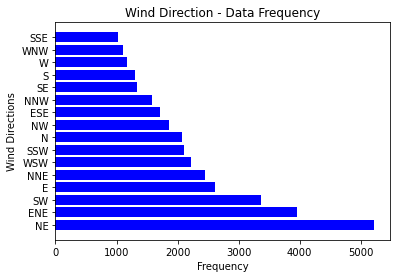

Number of Wind Direction 
NE     5221
ENE    3950
SW     3359
E      2608
NNE    2445
WSW    2212
SSW    2098
N      2066
NW     1860
ESE    1717
NNW    1589
SE     1341
S      1304
W      1171
WNW    1101
SSE    1022
Name: WinDir, dtype: int64


In [18]:
# Number of sample according to WinDir
plt.figure()
plt.barh(data["WinDir"].value_counts().index, data["WinDir"].value_counts(), color = "b")
#plt.xticks(data["WinDir"].values)
plt.xlabel("Frequency")
plt.ylabel("Wind Directions")
plt.title("Wind Direction - Data Frequency")
plt.show()
print(f"Number of Wind Direction \n{data['WinDir'].value_counts()}")

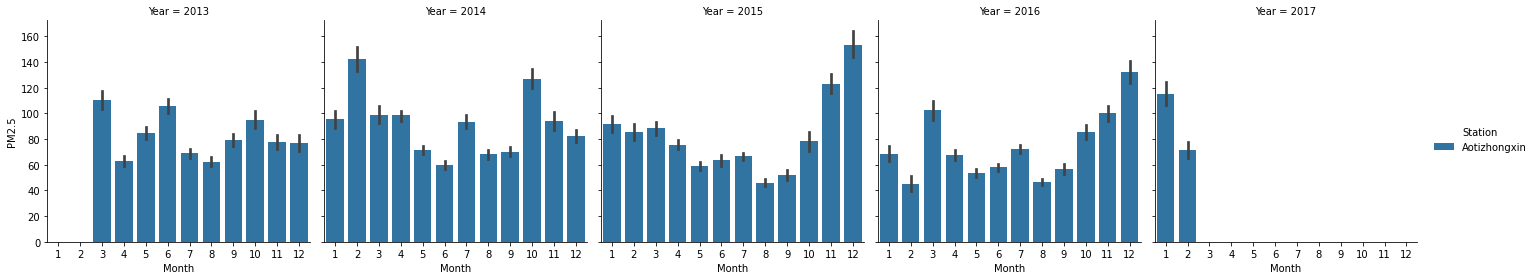

In [26]:
sns.catplot(x="Month", y="PM2.5",  hue="Station", col="Year",
                data=data, kind="bar", height=4)
plt.show()

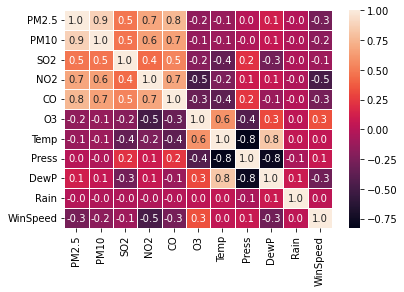

In [27]:
sns.heatmap(data.drop(["Year", "Month", "Day", "Hour", "Date"], axis=1).corr(),
            annot=True, linewidths=.5, fmt= '.1f')
plt.show()

### Yearly Analysis

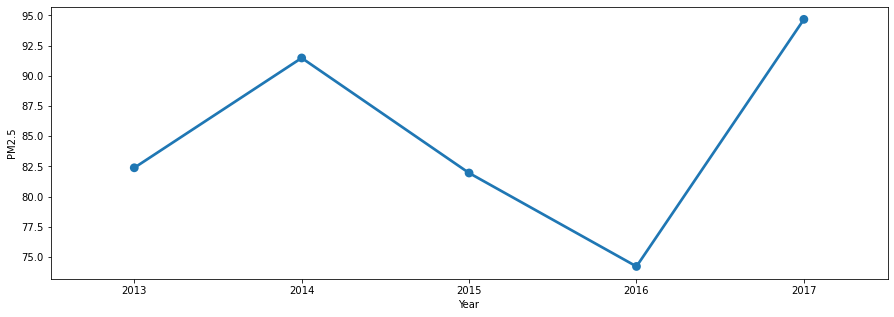

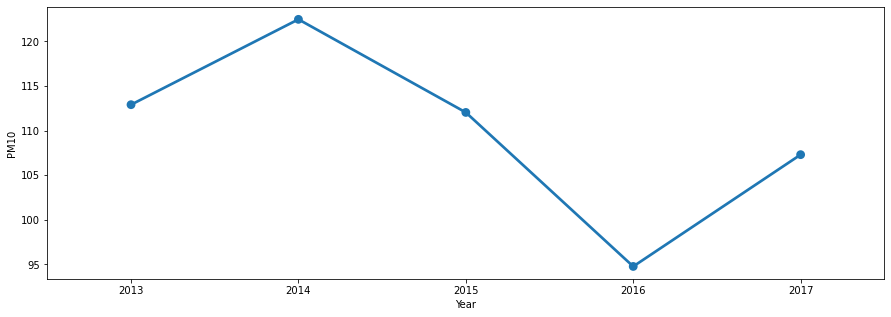

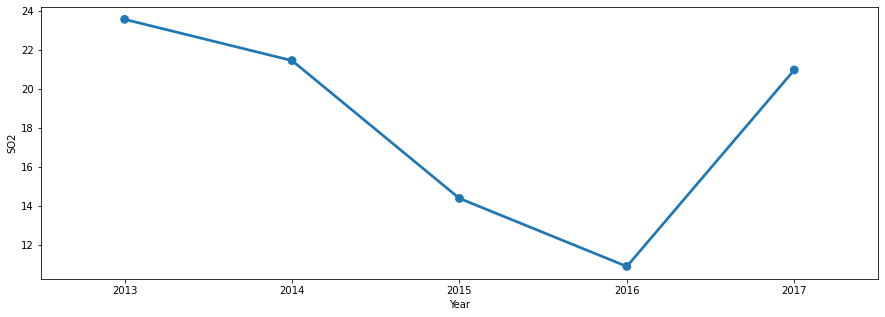

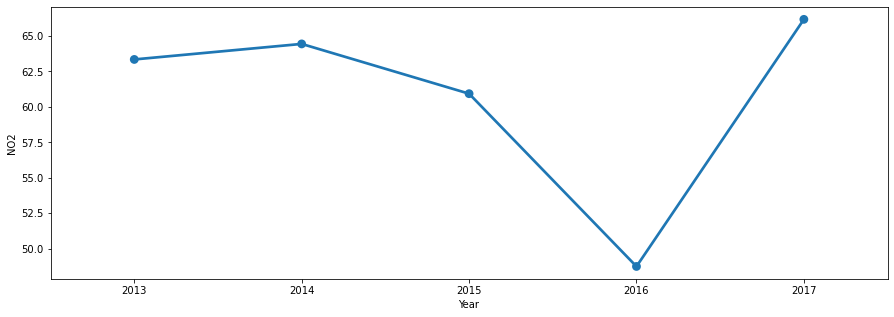

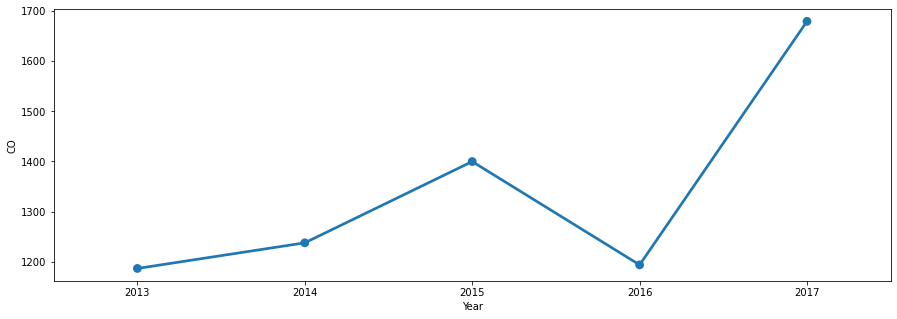

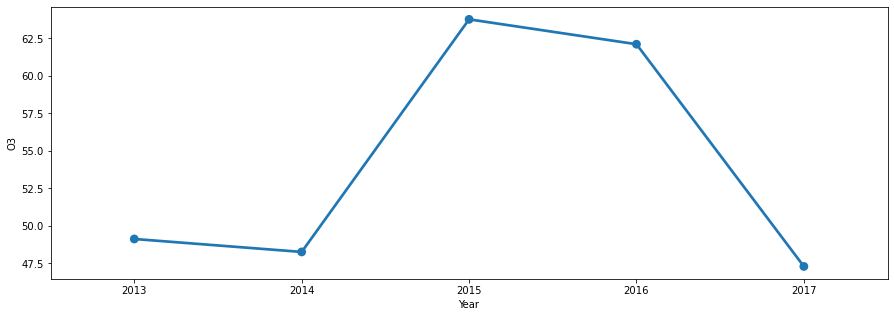

In [29]:
compounds = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
for i in compounds:    
    df = data[[i, 'Year']].groupby(["Year"]).mean().reset_index().sort_values(by='Year', ascending=False)
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='Year', y=i, data=df)

### Monthly Analysis

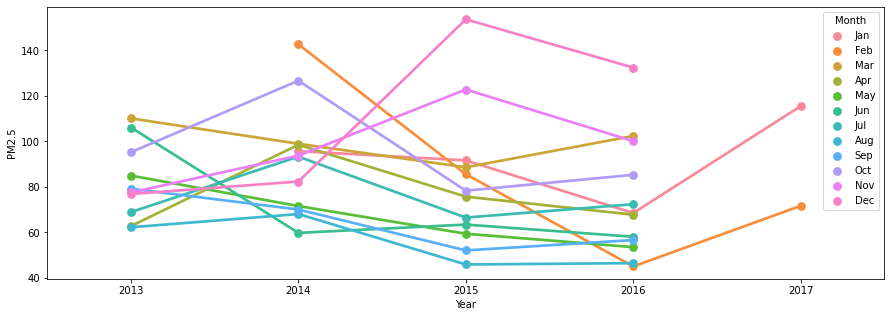

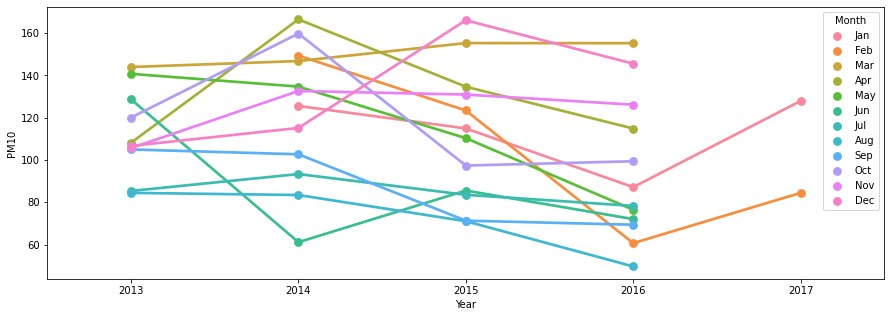

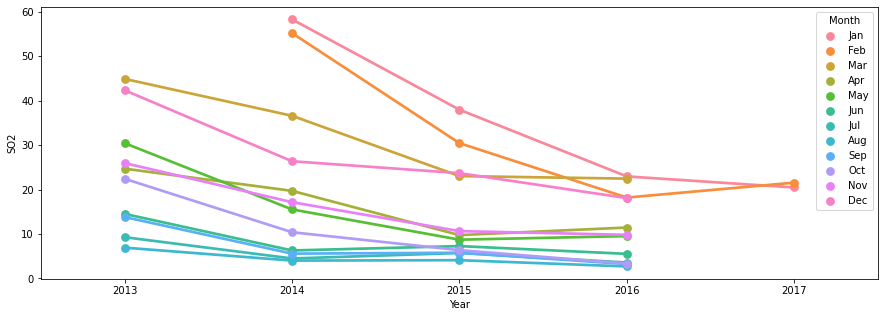

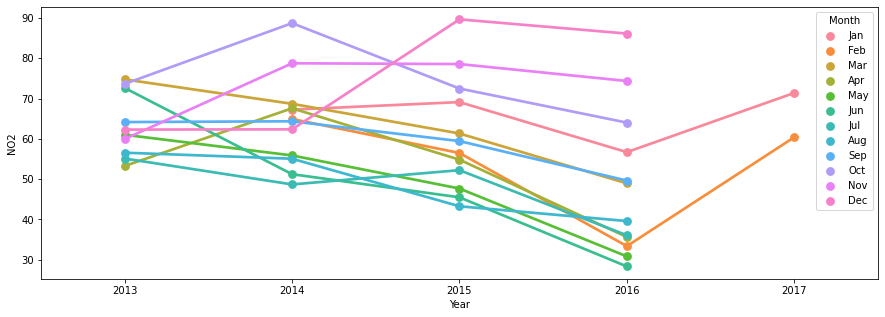

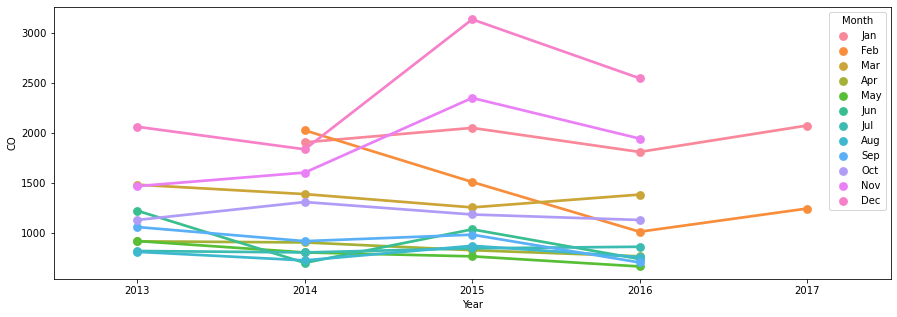

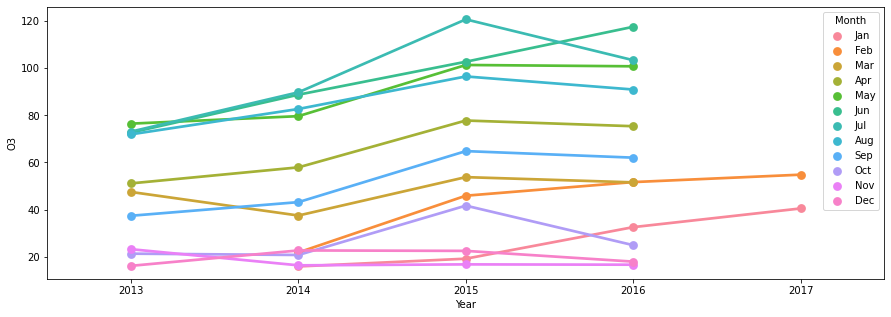

In [30]:
for i in compounds:
    temp_data = data.copy()
    temp_data.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                                                           'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
    df = temp_data[[i, 'Month', 'Year',]].groupby(["Year",
                                                    "Month"]).mean().reset_index().sort_values(by=['Year',
                                                                                                   'Month'], ascending=False)
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='Year', y=i, data=df, hue='Month', hue_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                                                                  'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

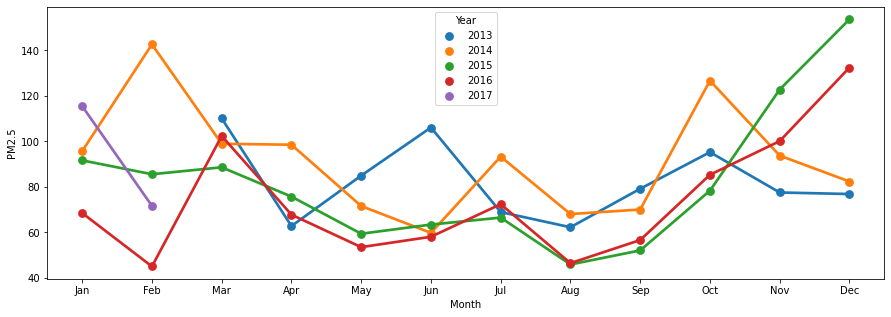

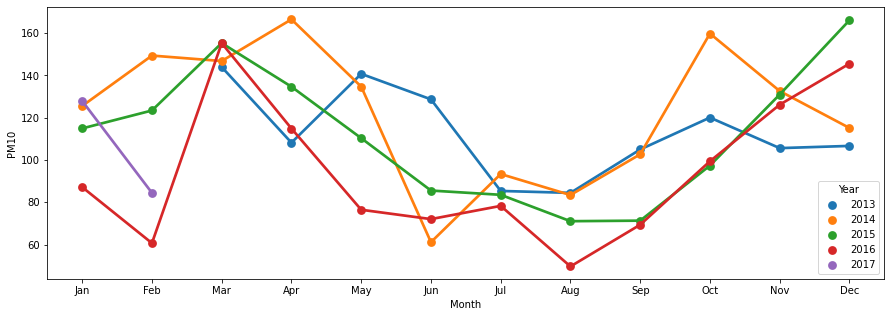

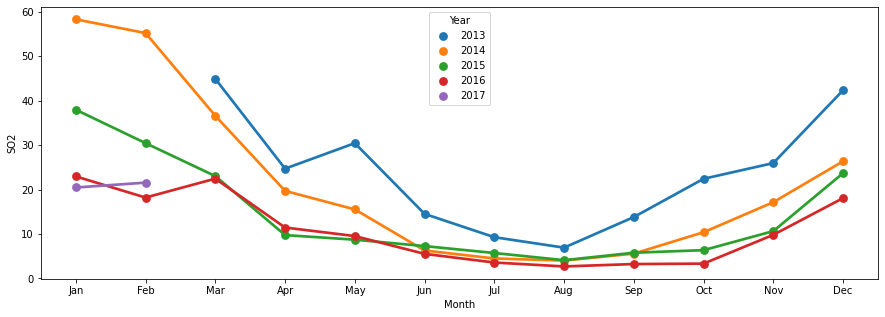

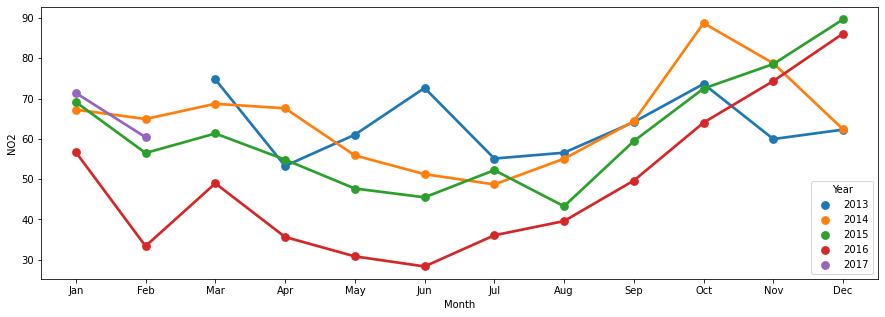

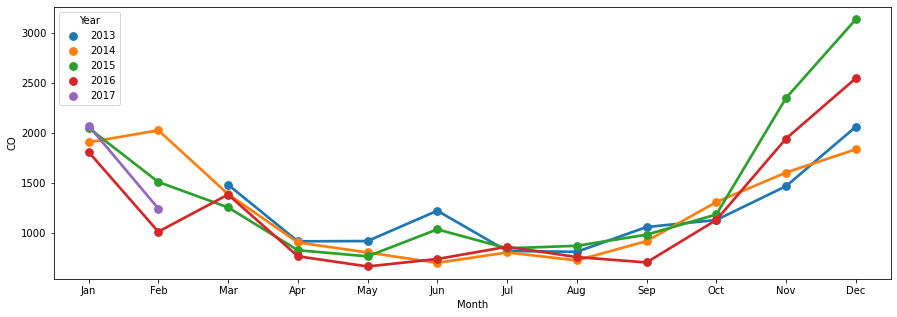

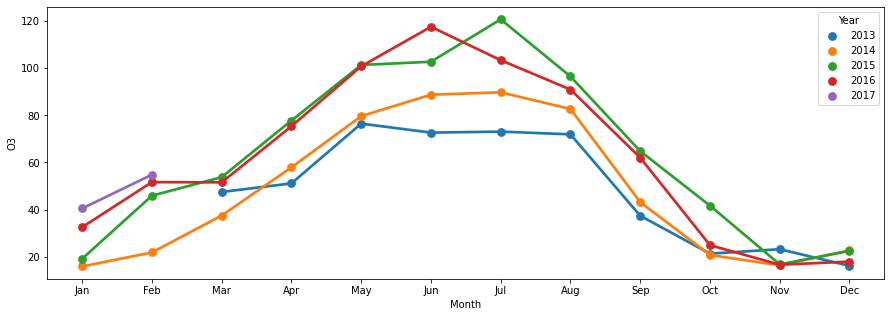

In [31]:
custom_dict = {'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5,
               'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}
for i in compounds:    
    temp_data = data.copy()
    temp_data.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                                                               'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
    df = temp_data[[i, 'Month', 'Year']].groupby(["Year",
                                                  "Month"]).mean().reset_index().sort_values(by=['Year', 
                                                                                                 'Month'], ascending=True)
    df = df.iloc[df['Month'].map(custom_dict).argsort()]
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='Month', y=i, data=df, hue="Year")

### Weekly Analysis

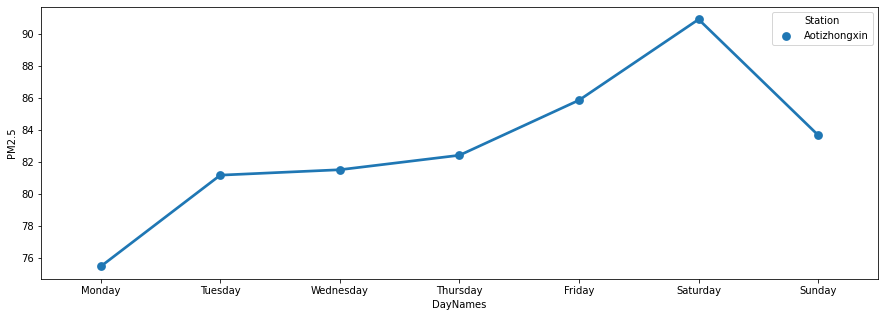

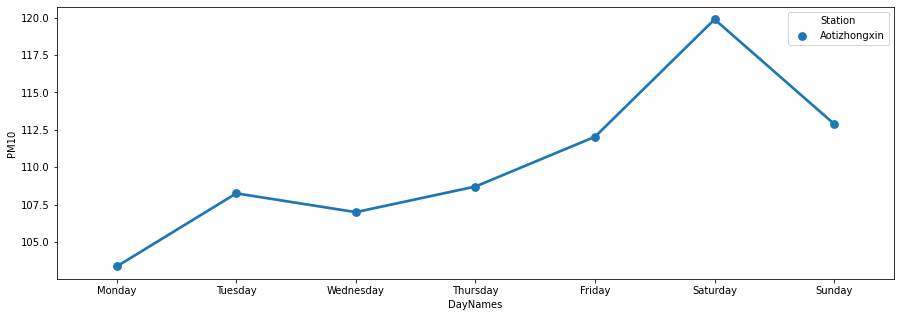

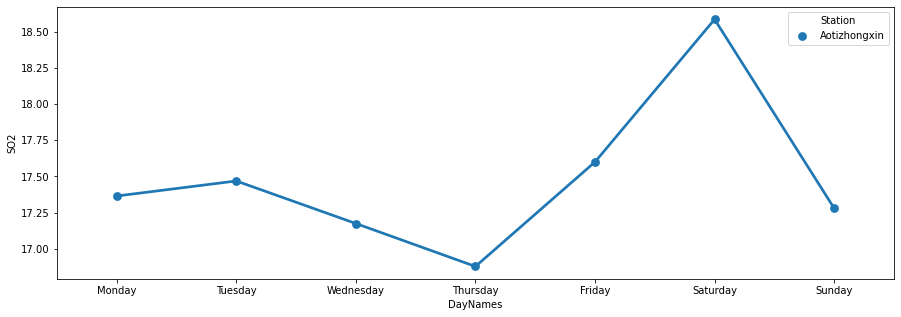

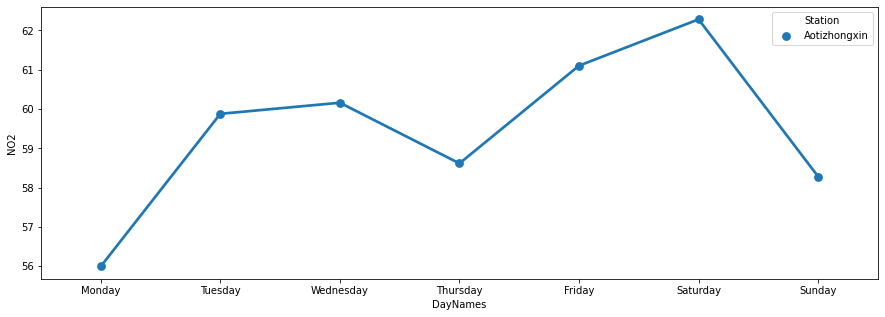

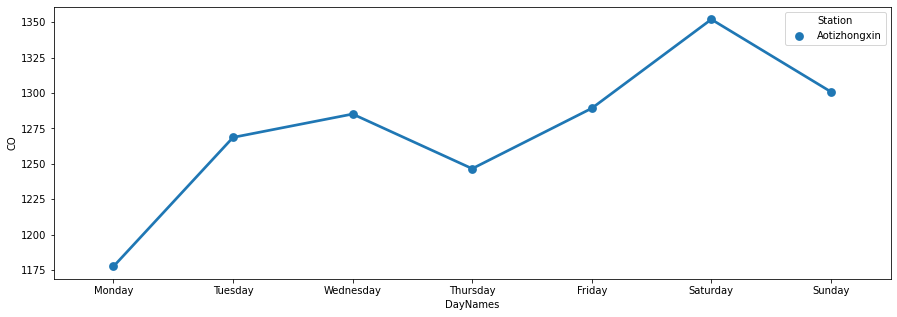

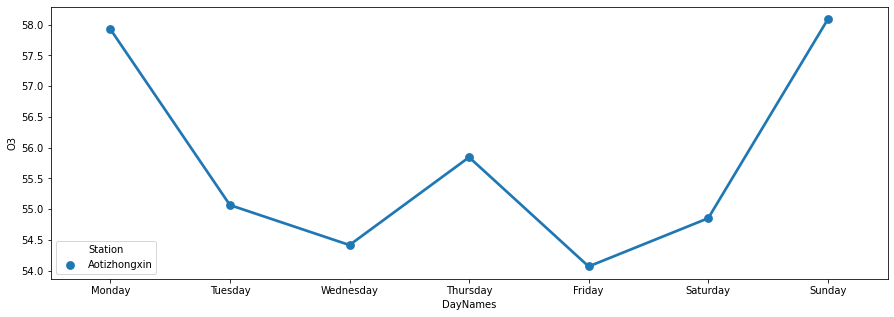

In [32]:
custom_day = {'Monday':0, 'Tuesday':1, 'Wednesday':2,
              'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}
for i in compounds:
    df = data[[i, 'DayNames',
               'Station']].groupby(["Station",
                                    "DayNames"]).mean().reset_index().sort_values(by=['Station',
                                                                                      'DayNames'], ascending=True)
    df = df.iloc[df['DayNames'].map(custom_day).argsort()]
    f,ax=plt.subplots(figsize=(15,5))
    sns.pointplot(x='DayNames', y=i, data=df, hue="Station")

### Hourly Analysis

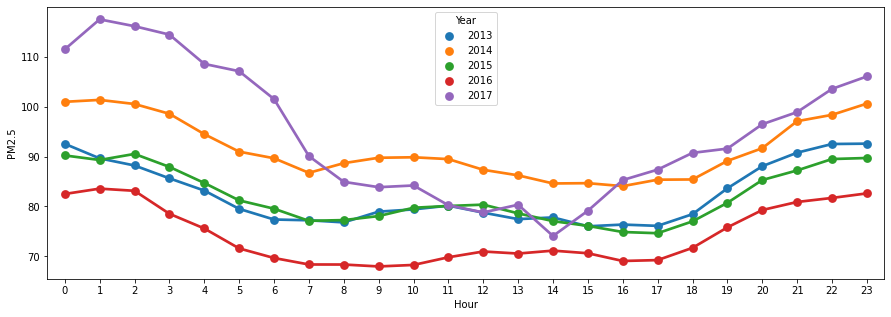

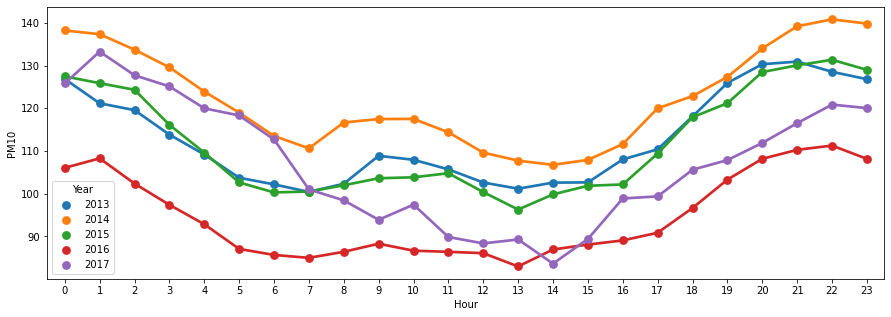

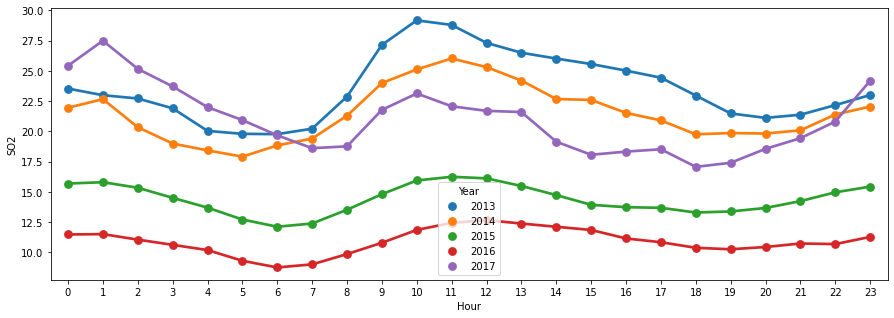

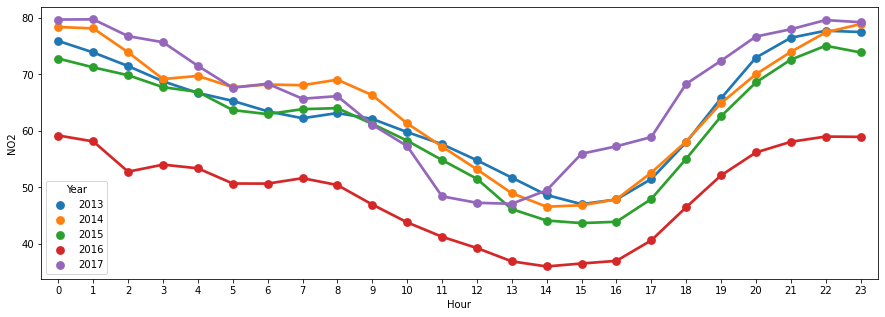

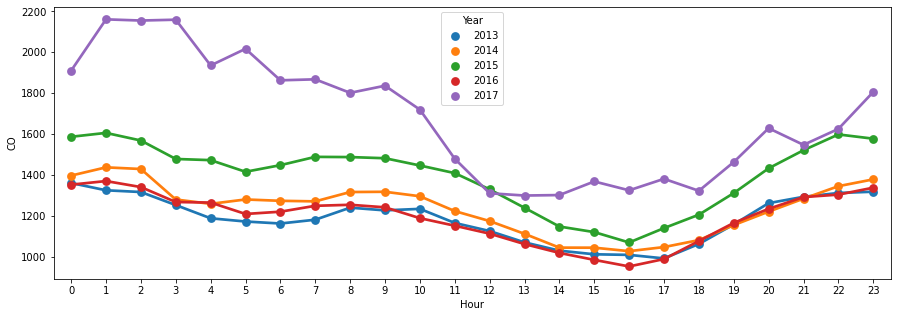

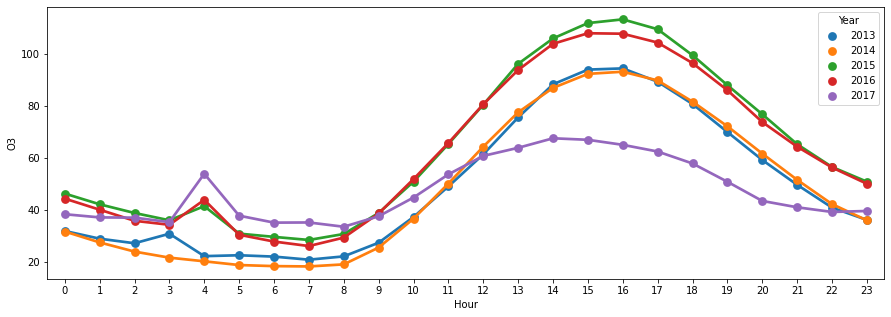

In [33]:
for i in compounds:   
    df = data[[i, 'Hour', 'Year']].groupby(["Year",
                                                 "Hour"]).mean().reset_index().sort_values(by=['Year',
                                                                                                 'Hour'], ascending=False)
    f,ax=plt.subplots(figsize=(15,5))
    sns.pointplot(x='Hour', y=i, data=df, hue="Year")
    plt.show()

### Station Based Analysis

In [ ]:
for i in compounds:  
    df = data[[i, 'Year', 'Station']].groupby(["Year",
                                               "Station"]).mean().reset_index().sort_values(by=['Station',
                                                                                                'Year'], ascending=False)
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='Year', y=i, data=df, hue="Station")
    plt.show()

## Preprocessing

In [34]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Year      35064 non-null  int64         
 1   Month     35064 non-null  int64         
 2   Day       35064 non-null  int64         
 3   Hour      35064 non-null  int64         
 4   PM2.5     35064 non-null  float64       
 5   PM10      35064 non-null  float64       
 6   SO2       35064 non-null  float64       
 7   NO2       35064 non-null  float64       
 8   CO        35064 non-null  float64       
 9   O3        35064 non-null  float64       
 10  Temp      35064 non-null  float64       
 11  Press     35064 non-null  float64       
 12  DewP      35064 non-null  float64       
 13  Rain      35064 non-null  float64       
 14  WinDir    35064 non-null  object        
 15  WinSpeed  35064 non-null  float64       
 16  Station   35064 non-null  object        
 17  Date      35

In [35]:
# drop some columns and reduce memory
data.drop(["DayNames", "Date", "PM10", "Year", "Month", "Day", "Hour"], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PM2.5     35064 non-null  float64
 1   SO2       35064 non-null  float64
 2   NO2       35064 non-null  float64
 3   CO        35064 non-null  float64
 4   O3        35064 non-null  float64
 5   Temp      35064 non-null  float64
 6   Press     35064 non-null  float64
 7   DewP      35064 non-null  float64
 8   Rain      35064 non-null  float64
 9   WinDir    35064 non-null  object 
 10  WinSpeed  35064 non-null  float64
 11  Station   35064 non-null  object 
dtypes: float64(10), object(2)
memory usage: 3.2+ MB


In [36]:
from sklearn.preprocessing import LabelEncoder
# define a function for label encoding
def labelEncoder(labelColumn):
    labelValues = labelColumn
    unique_labels = labelColumn.unique()
    le = LabelEncoder()
    labelColumn = le.fit_transform(labelColumn)
    print('Encoding Approach:')
    for i, j in zip(unique_labels, labelColumn[np.sort(np.unique(labelColumn, return_index=True)[1])]): 
        print(f'{i}  ==>  {j}')
    return labelColumn

In [37]:
categorical_variables = ["WinDir", "Station"]
for i in categorical_variables:
    print(f"For {i} column ")
    data[f"{i}"] = labelEncoder(data[f"{i}"])
    print("**********************************")

For WinDir column 
Encoding Approach:
NNW  ==>  6
N  ==>  3
NW  ==>  7
NNE  ==>  5
ENE  ==>  1
E  ==>  0
NE  ==>  4
W  ==>  13
SSW  ==>  11
WSW  ==>  15
SE  ==>  9
WNW  ==>  14
SSE  ==>  10
ESE  ==>  2
S  ==>  8
SW  ==>  12
**********************************
For Station column 
Encoding Approach:
Aotizhongxin  ==>  0
**********************************


In [38]:
data.head()

,PM2.5,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinDir,WinSpeed,Station
0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,6,4.4,0
1,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,3,4.7,0
2,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,6,5.6,0
3,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,7,3.1,0
4,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,3,2.0,0


In [39]:
# create input and output
X = data.drop('PM2.5', axis = 1)
y = data['PM2.5']

In [40]:
# for train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=128)

# see train and test dataset shape
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (28051, 11)
y_train: (28051,)
X_test: (7013, 11)
y_test: (7013,)


## Model Training and Evaluation

In [46]:
# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# make a function that include all regression models
def allRegressors(X_train, X_test, y_train, y_test):
    """
    This function use multiple machine learning regressors and show us the results of them 
    :param X_train: train input
    :param X_test: test input
    :param y_train: train output
    :param y_test: test output
    :return: Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) for each regressors and
    comparison plot for regressors according to RMSE and MAE
    """
    Regressors = [LinearRegression(), RandomForestRegressor(), GradientBoostingRegressor(), 
                  KNeighborsRegressor(), DecisionTreeRegressor()]
    mae_dict = {}
    mae_scores = []
    rmse_dict = {}
    rmse_scores = []
    
    # function for mean absolute error
    def maeScore(regressor):
        """
        :param regressor: regressor model function
        :return: mean absolute error for regressor
        """
        
        clf = regressor.fit(X_train, y_train)
        pred = clf.predict(X_test)
        mae_score = mean_absolute_error(y_test, pred)
        return mae_score
    
    # function for root mean square error
    def rmseScore(regressor):
        """
        :param regressor: regressor model function
        :return: root mean score error for regressor
        """
        
        clf = regressor.fit(X_train, y_train)
        pred = clf.predict(X_test)
        rmse_score = np.sqrt(mean_squared_error(y_test, pred))
        return rmse_score
    
    # mean absolute error, root mean square error for each regressors
    for regressor in Regressors:
        name = regressor.__class__.__name__
        mae_dict[name] = maeScore(regressor)
        mae_scores.append(maeScore(regressor))
        rmse_dict[name] = rmseScore(regressor)
        rmse_scores.append(rmseScore(regressor))
        print("*************************************************************************")
        print(f"{name} Mean Absolute Error = {mae_dict[name]}")
        print(f"{name} Root Mean Square Error = {rmse_dict[name]}")
    
        
    #Plotting the performance of regressors
    def plotPerformance(scores_list, scores_dict, metric:str):
        """
        :param scores_list: list that include evaluation scores 
        :param scores_dict: dictionary that include regressors and evaluation scores
        :param metric: metric name y axis 
        :return: plot of performance comparison of regressors
        """
        
        N = len(Regressors)
        w = 0.5
        x = np.arange(N)
        plt.bar(x, scores_list, width = w, align = 'center', color="g")
        plt.xlabel("Regressors")
        plt.title("Performance Comparison of Regressors")
        plt.ylabel(f"{metric} Error")
        plt.xticks(x, scores_dict.keys(), rotation=90)
        plt.yticks(np.arange(0, np.max(scores_list), np.max(scores_list)/len(scores_list)))
        plt.show()
    
    # call the functions
    plotPerformance(mae_scores, mae_dict, "Mean Absolute")
    plotPerformance(rmse_scores, rmse_dict, "Root Mean Square")

*************************************************************************
LinearRegression Mean Absolute Error = 30.128733903738578
LinearRegression Root Mean Square Error = 45.71279387056474
*************************************************************************
RandomForestRegressor Mean Absolute Error = 18.78547446171396
RandomForestRegressor Root Mean Square Error = 30.323265403811263
*************************************************************************
GradientBoostingRegressor Mean Absolute Error = 24.79935808273407
GradientBoostingRegressor Root Mean Square Error = 38.59509677594123
*************************************************************************
KNeighborsRegressor Mean Absolute Error = 25.403215742193066
KNeighborsRegressor Root Mean Square Error = 41.690572192491494
*************************************************************************
DecisionTreeRegressor Mean Absolute Error = 25.829419649222878
DecisionTreeRegressor Root Mean Square Error = 45.28447088282

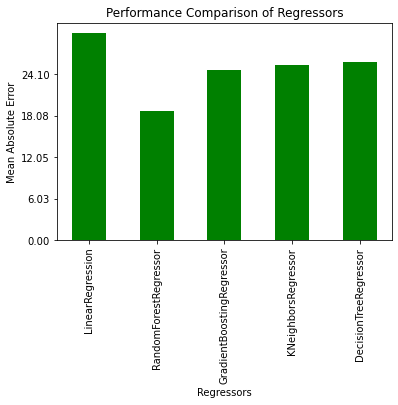

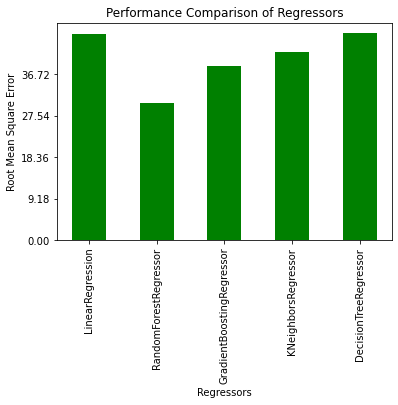

In [42]:
allRegressors(X_train, X_test, y_train, y_test)

## Hyperparameter Optimization

In [52]:
# Choose the best model for tuning
# RandomForestRegressor can be choose but it take to much time for GridSearchCV because of my CPU.
# Grid Search with Cross Validation
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)